In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('prod_.csv')
data.head(15)

,product,year,month,no. of new products bought,no of products left for selling,no. of products sold,prodects left,no of products to be bought,demand %
0,colgate,2019,1,60,60,46,0,46.0,76.666667
1,colgate,2019,2,32,46,38,14,24.0,118.750000
2,colgate,2019,3,40,62,47,22,25.0,117.500000
3,colgate,2019,4,36,51,40,15,25.0,111.111111
4,colgate,2019,5,56,67,58,11,47.0,103.571429
5,colgate,2019,6,41,50,39,9,30.0,95.121951
6,colgate,2019,7,58,69,51,11,40.0,87.931034
7,colgate,2019,8,31,47,47,16,31.0,151.612903
8,colgate,2019,9,100,100,56,0,56.0,56.000000
9,colgate,2019,10,0,44,44,44,44.0,44.000000


In [4]:
data['product'].unique()

array(['colgate', 'gemini  tea powder', 'suger', 'freedom sunflower oil',
       'life boy soap', 'santoor'], dtype=object)

In [5]:
ohe = OneHotEncoder()
ohe.fit(data[['product']])
ct=make_column_transformer((OneHotEncoder(),[0]),
                                    remainder='passthrough')

In [6]:
x = data.iloc[:,[0,1,2]].values
y = data.iloc[:, [5]].values

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
print(x)

[['colgate' 2019 1]
 ['colgate' 2019 2]
 ['colgate' 2019 3]
 ['colgate' 2019 4]
 ['colgate' 2019 5]
 ['colgate' 2019 6]
 ['colgate' 2019 7]
 ['colgate' 2019 8]
 ['colgate' 2019 9]
 ['colgate' 2019 10]
 ['colgate' 2019 11]
 ['colgate' 2019 12]
 ['colgate' 2020 1]
 ['colgate' 2020 2]
 ['colgate' 2020 3]
 ['colgate' 2020 4]
 ['colgate' 2020 5]
 ['colgate' 2020 6]
 ['colgate' 2020 7]
 ['colgate' 2020 8]
 ['colgate' 2020 9]
 ['colgate' 2020 10]
 ['colgate' 2020 11]
 ['colgate' 2020 12]
 ['colgate' 2021 1]
 ['colgate' 2021 2]
 ['colgate' 2021 3]
 ['colgate' 2021 4]
 ['colgate' 2021 5]
 ['colgate' 2021 6]
 ['colgate' 2021 7]
 ['colgate' 2021 8]
 ['colgate' 2021 9]
 ['colgate' 2021 10]
 ['colgate' 2021 11]
 ['colgate' 2021 12]
 ['gemini  tea powder' 2019 1]
 ['gemini  tea powder' 2019 2]
 ['gemini  tea powder' 2019 3]
 ['gemini  tea powder' 2019 4]
 ['gemini  tea powder' 2019 5]
 ['gemini  tea powder' 2019 6]
 ['gemini  tea powder' 2019 7]
 ['gemini  tea powder' 2019 8]
 ['gemini  tea powder' 

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [10]:
x_train

array([['life boy soap', 2019, 8],
       ['gemini  tea powder', 2019, 5],
       ['colgate', 2020, 2],
       ['freedom sunflower oil', 2019, 5],
       ['suger', 2020, 1],
       ['colgate', 2021, 1],
       ['colgate', 2021, 7],
       ['gemini  tea powder', 2021, 1],
       ['gemini  tea powder', 2020, 9],
       ['life boy soap', 2019, 3],
       ['suger', 2021, 1],
       ['colgate', 2020, 8],
       ['life boy soap', 2019, 10],
       ['life boy soap', 2020, 6],
       ['gemini  tea powder', 2020, 7],
       ['life boy soap', 2020, 10],
       ['suger', 2019, 4],
       ['gemini  tea powder', 2020, 4],
       ['suger', 2021, 8],
       ['freedom sunflower oil', 2022, 1],
       ['freedom sunflower oil', 2019, 1],
       ['suger', 2019, 10],
       ['life boy soap', 2020, 8],
       ['freedom sunflower oil', 2019, 9],
       ['life boy soap', 2019, 1],
       ['suger', 2021, 11],
       ['gemini  tea powder', 2019, 6],
       ['colgate', 2020, 3],
       ['colgate', 2021, 4],
   

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [12]:
lr = LinearRegression()

In [13]:
from pandas.core.algorithms import mode
from sklearn import pipeline
pipe=make_pipeline(ct,lr)
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), [0])])),
                ('linearregression', LinearRegression())])

In [14]:
y_pred= pipe.predict(x_test)
score = r2_score(y_pred,y_test)
score

0.9052419107148001

In [15]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    dt = LinearRegression()
    piped=make_pipeline(ct,dt)
    piped.fit(x_train,y_train)
    y_pred=piped.predict(x_test)
    scores.append(r2_score(y_test,y_pred))
scores[np.argmax(scores)]

0.9855205302905855

In [16]:
pipe.predict([['santoor',2021,3]])

array([[153.92103069]])

In [17]:
c=[]
for i in range(0,12):
  c.append(float(pipe.predict([['colgate',2023,i]])))

In [18]:
c

[130.1850150872051,
 130.42168492095516,
 130.65835475469794,
 130.895024588448,
 131.13169442219078,
 131.36836425594083,
 131.6050340896909,
 131.84170392343367,
 132.07837375718373,
 132.31504359093378,
 132.55171342467656,
 132.78838325842662]

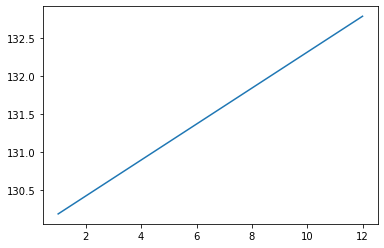

In [19]:
month=data.iloc[:12,[2]].values
plt.plot(month,c)
plt.show()

In [20]:
warnings.simplefilter(action='ignore', category=UserWarning)

# dt

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import fbeta_score, make_scorer
dt = DecisionTreeRegressor()
parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
scoring_function = make_scorer(fbeta_score, beta=2)
dtg = GridSearchCV(dt, param_grid=parameters, scoring=scoring_function)
piped = make_pipeline(ct,sc,dtg)
piped.fit(x_train,y_train)
y_pred=piped.predict(x_test)
r2_score(y_test,y_pred)

0.8615531417887847

In [22]:
c_=[]
for i in range(0,12):
    c_.append(float(piped.predict([['colgate',2022,i]])))

In [23]:
c_

[67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181,
 67.81818181818181]

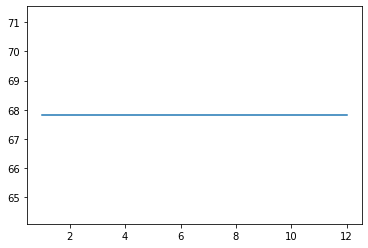

In [24]:
month=data.iloc[:12,[2]].values
plt.plot(month,c_)
plt.show()

# rf

In [25]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()

piper = make_pipeline(ct,estimator)
piper.fit(x_train, y_train)
y_pred= piper.predict(x_test)
r2_score(y_test, y_pred)

0.9204993654377213

In [26]:
piper.predict([['suger',2023,1]])

array([406.])

In [27]:
k=data['product'].unique()
colgate1=[]
for j in range(1,13):
    colgate1.append(float(piper.predict([['colgate',2022,j]])))

In [28]:
k

array(['colgate', 'gemini  tea powder', 'suger', 'freedom sunflower oil',
       'life boy soap', 'santoor'], dtype=object)

In [29]:
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
p6=[]
for i in range(0,6):
  for j in range(1,13):
    if i==0:
      p1.append(float(piper.predict([[k[i],2022,j]])))
    if i==1:
      p2.append(float(piper.predict([[k[i],2022,j]])))
    if i==2:
      p3.append(float(piper.predict([[k[i],2022,j]])))
    if i==3:
      p4.append(float(piper.predict([[k[i],2022,j]])))
    if i==4:
      p5.append(float(piper.predict([[k[i],2022,j]])))
    if i==5:
      p6.append(float(piper.predict([[k[i],2022,j]])))
    


In [30]:
p2

[41.06,
 43.16,
 46.87,
 39.98,
 35.38,
 37.45,
 38.26,
 39.02,
 37.87,
 37.55,
 37.25,
 38.1]

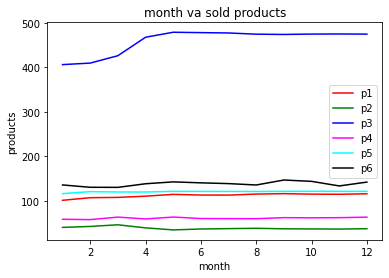

In [31]:
month=data.iloc[:12,[2]].values
plt.plot(month,p1,c='red',label='p1')
plt.plot(month,p2,c='green',label='p2')
plt.plot(month,p3,c='blue',label='p3')
plt.plot(month,p4,c='magenta',label='p4')
plt.plot(month,p5,c='cyan',label='p5')
plt.plot(month,p6,c='black',label='p6')
plt.title('month va sold products')
plt.xlabel('month')
plt.ylabel('products')
plt.legend()
plt.show()

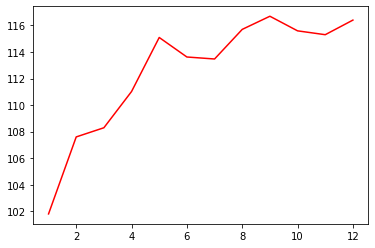

In [32]:
month=data.iloc[:12,[2]].values
plt.plot(month,colgate1,c='red',label='p1')
plt.show()

In [33]:
k

array(['colgate', 'gemini  tea powder', 'suger', 'freedom sunflower oil',
       'life boy soap', 'santoor'], dtype=object)

In [34]:
m=0
n=36
p=[]
for i in range(0,6):
    k[i]=data.iloc[m:n,[0,1,2,5]].values
    k[i]=pd.DataFrame(k[i])
    k[i]=k[i].rename(columns={0:"product",1:'year',2:'month',3:'sold product'})
    m= n
    n=n+41


In [35]:
b=k[0]['month'].unique().tolist()

In [36]:
def to2D(twoD):
    oneD = []
    for i in twoD:
        oneD.extend(i)
    return(oneD)

In [37]:

to2D(k[0].iloc[24:36,[3]].values.tolist())

[74, 86, 89, 95, 112, 98, 99, 115, 112, 98, 110, 109]

Text(0.5, 1.0, 'colgate 2021')

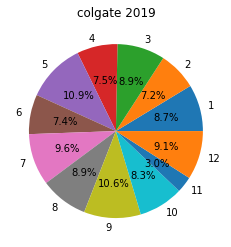

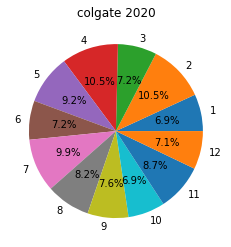

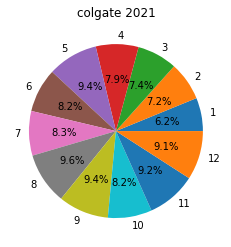

In [38]:
fig, ax = plt.subplots()
ax.pie(to2D(k[0].iloc[:12,[3]].values.tolist()),labels=b,autopct='%1.1f%%')
ax.set_title('colgate 2019')
fig,ax2 = plt.subplots()
ax2.pie(to2D(k[0].iloc[12:24,[3]].values.tolist()),labels=b,autopct='%1.1f%%')
ax2.set_title('colgate 2020')
fig,ax3 = plt.subplots()
ax3.pie(to2D(k[0].iloc[24:36,[3]].values.tolist()),labels=b,autopct='%1.1f%%')
ax3.set_title('colgate 2021')

In [39]:
for i in range(0,6):
  k[i]=k[i].pivot(index='month', columns = 'year',values = 'sold product')

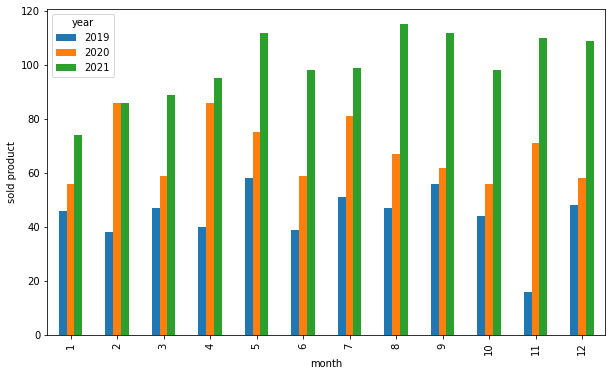

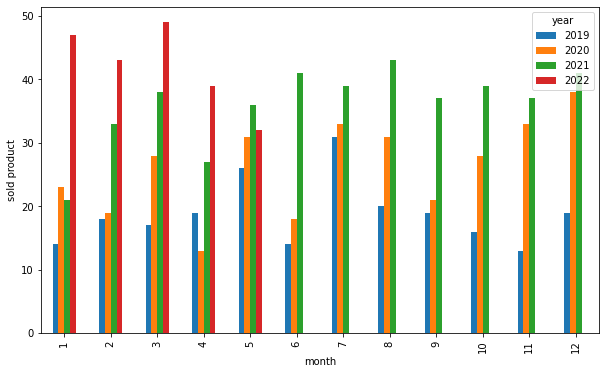

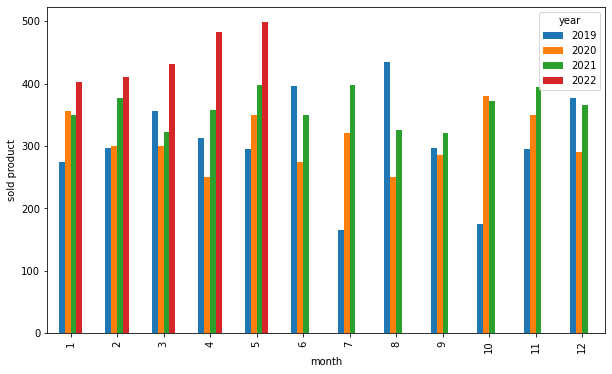

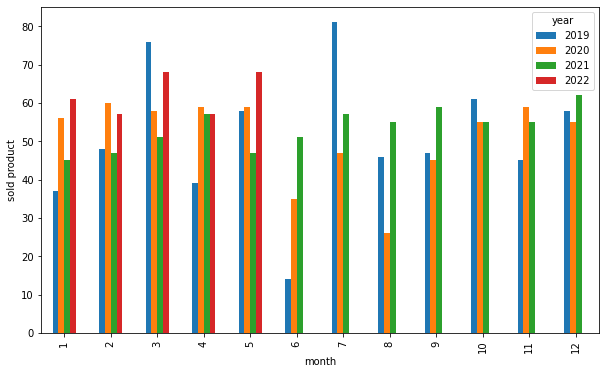

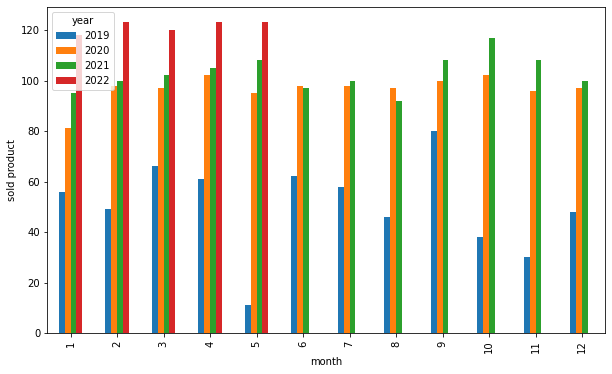

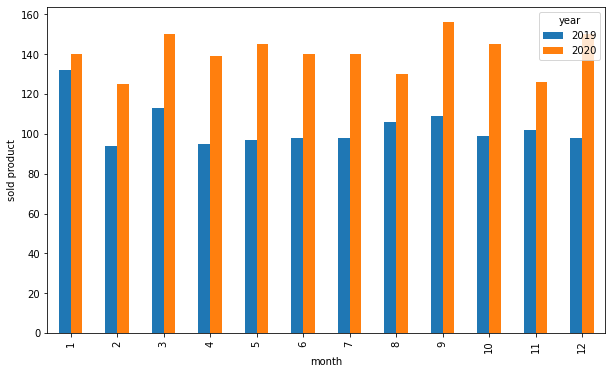

In [40]:
for i in range(0,6):
  k[i].plot(kind='bar',figsize=(10,6))
  plt.xlabel('month')
  plt.ylabel('sold product')

In [41]:
colgate=data.iloc[:36,[0,1,2,5]].values
colgate=pd.DataFrame(colgate)
colgate=colgate.rename(columns={0:"product",1:'year',2:'month',3:'sold product'})
colgate

,product,year,month,sold product
0,colgate,2019,1,46
1,colgate,2019,2,38
2,colgate,2019,3,47
3,colgate,2019,4,40
4,colgate,2019,5,58
5,colgate,2019,6,39
6,colgate,2019,7,51
7,colgate,2019,8,47
8,colgate,2019,9,56
9,colgate,2019,10,44


In [42]:
gta= data.iloc[36:72,[0,1,2,5]].values
gta=pd.DataFrame(gta)
gta=gta.rename(columns={0:"product",1:'year',2:'month',3:'sold product'})
gta

,product,year,month,sold product
0,gemini tea powder,2019,1,14
1,gemini tea powder,2019,2,18
2,gemini tea powder,2019,3,17
3,gemini tea powder,2019,4,19
4,gemini tea powder,2019,5,26
5,gemini tea powder,2019,6,14
6,gemini tea powder,2019,7,31
7,gemini tea powder,2019,8,20
8,gemini tea powder,2019,9,19
9,gemini tea powder,2019,10,16


In [43]:
colgate=colgate.pivot(index='month', columns = 'year',values = 'sold product')
gta=gta.pivot(index='month', columns = 'year',values = 'sold product')
gta=pd.DataFrame(gta)
colgate=pd.DataFrame(colgate)

In [44]:
[colgate,gta]

[year  2019 2020 2021
 month               
 1       46   56   74
 2       38   86   86
 3       47   59   89
 4       40   86   95
 5       58   75  112
 6       39   59   98
 7       51   81   99
 8       47   67  115
 9       56   62  112
 10      44   56   98
 11      16   71  110
 12      48   58  109,
 year  2019 2020 2021
 month               
 1       14   23   21
 2       18   19   33
 3       17   28   38
 4       19   13   27
 5       26   31   36
 6       14   18   41
 7       31   33   39
 8       20   31   43
 9       19   21   37
 10      16   28   39
 11      13   33   37
 12      19   38   41]

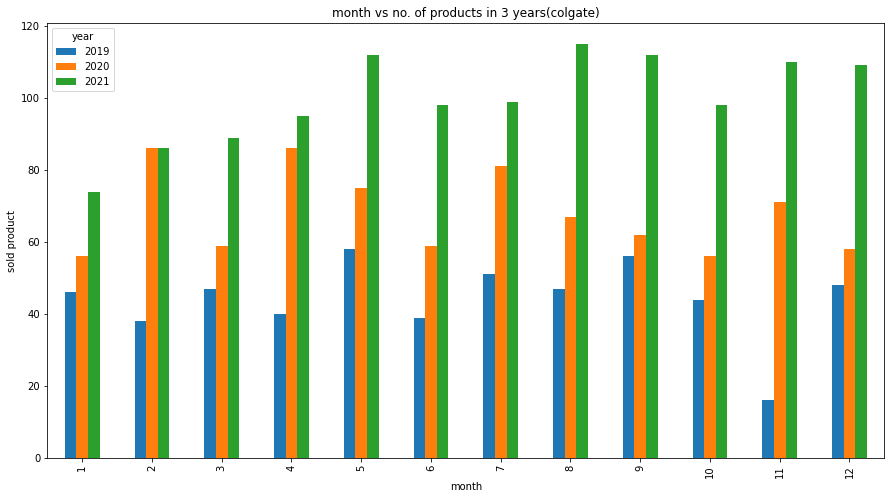

In [45]:
colgate.plot(kind='bar',figsize=(15,8))
plt.xlabel('month')
plt.ylabel('sold product')
plt.title('month vs no. of products in 3 years(colgate)')
plt.show()

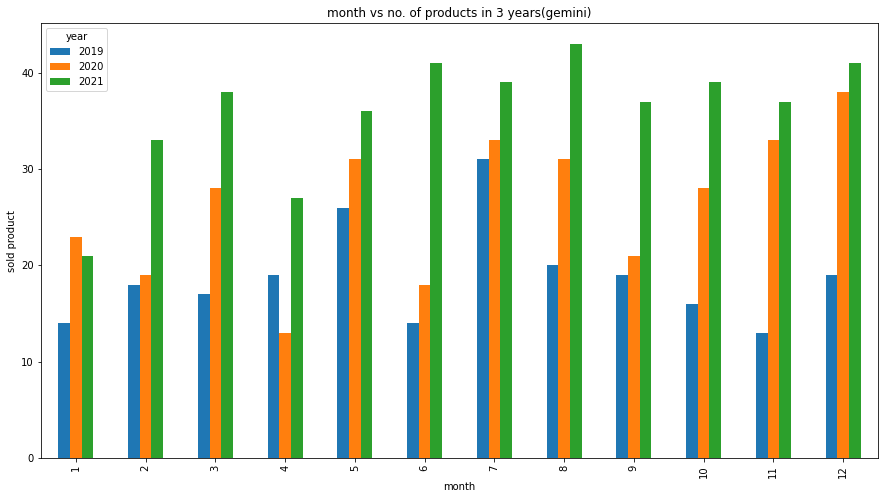

In [46]:
#@title gemini tea powder graph
#@markdown this graph shows us the variations of demnad of product in the 3 years
gta.plot(kind='bar',figsize=(15,8))
plt.xlabel('month')
plt.ylabel('sold product')
plt.title('month vs no. of products in 3 years(gemini)')
plt.show()

xgb

In [47]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
pipex = make_pipeline(ct,xgb_r)
pipex.fit(x_train, y_train)
y_pred= pipex.predict(x_test)
r2_score(y_test, y_pred)

[20:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


0.9627793752165374

In [48]:
pipex.predict([['colgate',2022,3]])

array([93.97856], dtype=float32)

In [49]:
k=data['product'].unique()
k[1]

'gemini  tea powder'

In [50]:
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
p6=[]
for i in range(0,6):
  for j in range(1,13):
    if i==0:
      p1.append(float(pipex.predict([[k[i],2022,j]])))
    if i==1:
      p2.append(float(pipex.predict([[k[i],2022,j]])))
    if i==2:
      p3.append(float(pipex.predict([[k[i],2022,j]])))
    if i==3:
      p4.append(float(pipex.predict([[k[i],2022,j]])))
    if i==4:
      p5.append(float(pipex.predict([[k[i],2022,j]])))
    if i==5:
      p6.append(float(pipex.predict([[k[i],2022,j]])))
    


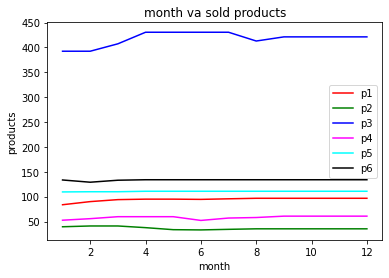

In [51]:
month=data.iloc[:12,[2]].values
plt.plot(month,p1,c='red',label='p1')
plt.plot(month,p2,c='green',label='p2')
plt.plot(month,p3,c='blue',label='p3')
plt.plot(month,p4,c='magenta',label='p4')
plt.plot(month,p5,c='cyan',label='p5')
plt.plot(month,p6,c='black',label='p6')
plt.title('month va sold products')
plt.xlabel('month')
plt.ylabel('products')
plt.legend()
plt.show()

In [52]:
p1

[83.70703887939453,
 89.99624633789062,
 93.97856140136719,
 94.94483947753906,
 94.94483947753906,
 94.47050476074219,
 95.63092041015625,
 96.67689514160156,
 96.67689514160156,
 96.67689514160156,
 96.67689514160156,
 96.67689514160156]

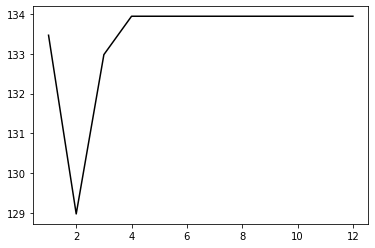

In [53]:
plt.plot(month,p6,c='black',label='p6')

In [54]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

ImportError: initialization failed

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann=ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann=ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
pipea=make_pipeline(ct,ann)

In [ ]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

# pickle

In [ ]:
import pickle
pickle.dump(piper,open('dpprod.pkl','wb'))